<p style="text-align:center;">
<img src="https://i.ibb.co/2M6ZcJg/swanbanner.png"
     alt="DigitalFuturesLogo"
     style="float: center; margin-right: 10px;" />
</p>


# Swan Teleco Project
----
## Team: Swan Hot Encoding
----
### Project Overview
The aim of this project is to build predictive a predictive model in order to predict churn risk from customer data. We will explore the model options available to use and evaluate which is most appropriate based on the data provided to us by Swan Teleco.

### Deliverables
* Information Deck
* List of 500 customers most likely to churn
* Churn probability for the remaining customers

### Team Members
* George Brignell-Cash
* Conor Mckenna-Cuthbert
* Jake Haycocks

----
# Table of Contents
----
1. DATA CLEANING
  - 1.1 Importing Packages, Data and Functions
  - 1.2 Cleaning
2. EDA
  - 2.1 Service and subscriptions
  - 2.2 Churner feedback
  - 2.3 General Analysis
3. Test/Train Split
4. Feature Engineering
5. Our Models
  - 5.1 Initial Feature Analysis and Selection
  - 5.2 Decision Tree
    - 5.2.1 Model Training
    - 5.2.2 Model Evaluation
  - 5.3 Random Forest
    - 5.3.1 Model Training
    - 5.3.2 Model Evaluation
  - 5.4 Random Forest with SMOTE Oversampling
    - 5.4.1 Model Training and Oversampling
    - 5.4.2 Model Evaluation
  - 5.5 Logistic Regression
    - 5.5.1 Model Training SKLearn
    - 5.5.2 Model Evaluation SKLearn
    - 5.5.3 Model Training Statsmodels
    - 5.5.4 Model Evaluation Statsmodels
  - 5.6 Model Selection
6. List Creation
  - 6.1 Formatting
  - 6.2 Exporting
5. Exploring Incentives
  - 7.1 Top 500 at-risk Customers
  - 7.2 Discounts to Monthly Rate
  - 7.3 Internet Service Offers
  - 7.4 Changes in Contract
  - 7.5 Misc.

----
# 1.0 Data Cleaning
----

## 1.1 Importing Packages, Data and Functions

In [ ]:
pip install squarify

In [ ]:
# The usual suspects
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Other visualization
import squarify

# train/test split, scaling metrics from sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

# logistic regression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# seaborn style settings
sns.set(style="darkgrid")
sns.set_context("notebook")
sns.set_palette("Spectral_r")

In [ ]:
def get_vc_columns(df, x):
    """
    Takes a pandas dataframe and returns a list of columns which have x different values in that column
    """
    columns = df.columns
    num_columns = []
    for column in columns:
        if df[column].value_counts().shape[0] == x:
            num_columns.append(column)
    return num_columns

## 1.2 Cleaning

In [ ]:
pd.set_option('display.max_columns', None)

#df = pd.read_csv('Telco_Churn.csv')
df = pd.read_excel('1_-_Project_Data.xlsx')# Take a look at the df
print(df.shape)
df.head()

(7043, 31)


,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [ ]:
df.isna().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Reason         5174
dtype: int64

In [ ]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Churn Value
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,0.265370
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,0.441561
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,0.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,0.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,0.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,1.000000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,1.000000


In [ ]:
df.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [ ]:
df['Total Charges'] = df['Total Charges'].astype('string')
# Changing Total Charge datatypes and accounting for 0s in the form of '' or ' '
df['Total Charges'] = df['Total Charges'].apply(lambda x: x if x.strip() != '' else '0')
df['Total Charges'] = df['Total Charges'].astype(float)

In [ ]:
df['Churn Value'].value_counts()

0    5174
1    1869
Name: Churn Value, dtype: int64

Two things to note here.
- Firstly, we **don't have class balance** which could be an issue to address for modelling.
- Secondly, we have 5174 customers who did not churn which should explain our 5174 missing churn reasons.

In [ ]:
# Double checking all our customers who didn't churn are missing reasons
df.loc[df['Churn Value'] == 0]['Churn Reason'].isna().sum()

5174

All of our missing churn values are from customer who have not churned.

Some of the given columns will not be useful for our analysis because they don't have more than one value and some just act as IDs.

In [ ]:
# find all single value columns
single_value_columns = get_vc_columns(df, 1)
print(single_value_columns)

['Count', 'Country', 'State']


We can see that Count, Country and State all only have 1 value. All our customers are in California in the US.

In [ ]:
single_value_columns.append('CustomerID')
df.drop(columns = single_value_columns, axis=1, inplace=True)
df.head(2)

,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved


----
# 2.0 EDA
----
There are a few questions we want to address at the EDA stage:
* What are the **demographics** of churners?
* Which **services** are they signed up to?
* What were the primary **reasons** for churning?

So what are our key demographics through which to analyze this question?
Gender, Senior Citizen, Partner, Dependents, city/zipcode?

Though it is best practice to Test/Train split before EDA to prevent data leakage, as we have a very small data set we decided to perform EDA before the split.

## 2.1 Services and subscriptions

Grouped customers by the different services they have. These are internet service, phone service and whether they have any subscriptions.




In [ ]:
df[['Internet Service']].isin(['DSL','Fiber optic'])
subscriptions = df.iloc[:,13:19]
#subscriptions.drop(columns = ['Multiple Lines'],inplace = True)
np_subs = np.array(subscriptions.isin(['Yes','DSL','Fiber optic']))
df['Subscription Count'] = np_subs.sum(axis = 1)

In [ ]:
df['Subscription Count'] = np_subs.sum(axis = 1)
df['Subscriptions bool'] = df['Subscription Count'].apply(lambda x: True if x else False)
df['Internet bool'] = df['Internet Service'].apply(lambda x: True if x != 'No' else False)
churn_by_service = df.groupby(['Phone Service', 'Internet bool', 'Subscriptions bool'])[['Churn Value']].agg(['mean','count']).reset_index()
churn_by_service

Phone Service Internet bool Subscriptions bool Churn Value      
                                                        mean count
0            No          True              False    0.437500    80
1            No          True               True    0.224252   602
2           Yes         False              False    0.074050  1526
3           Yes          True              False    0.533442   613
4           Yes          True               True    0.298200  4222

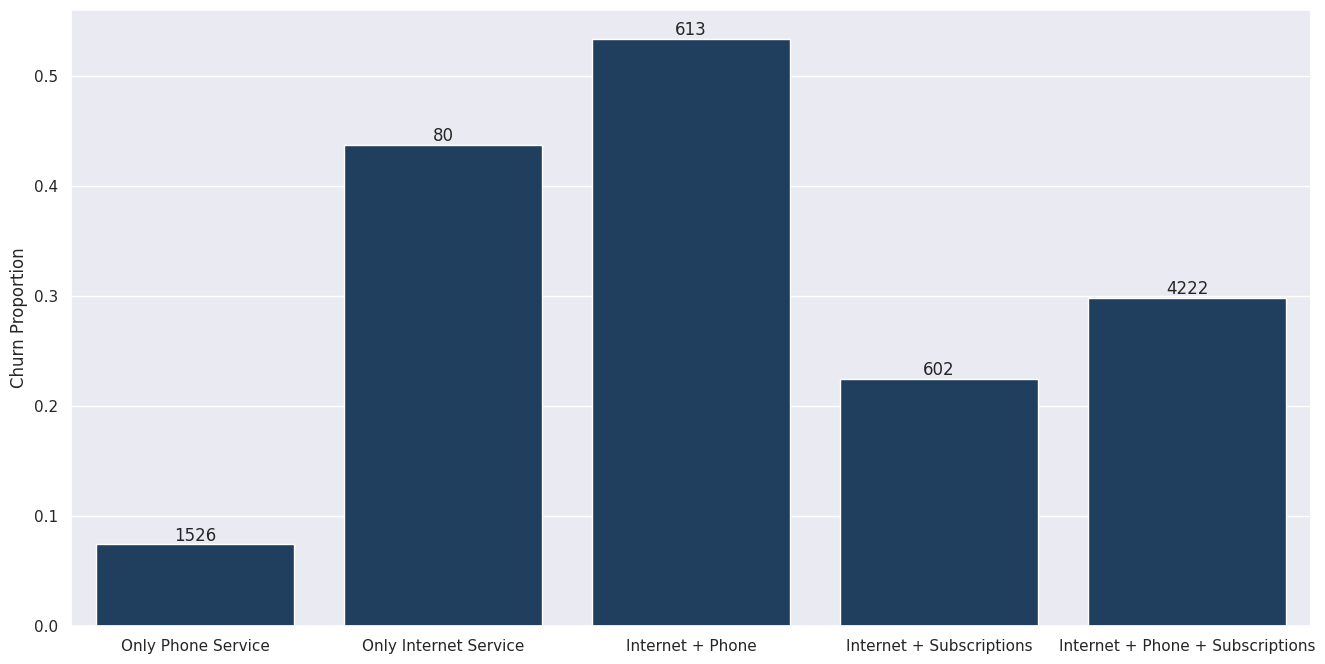

In [ ]:
order = [2,0,3,1,4]
service_categories = ['Only Phone Service', 'Only Internet Service', 'Internet + Phone', 'Internet + Subscriptions',
                 'Internet + Phone + Subscriptions']

ax = plt.figure(figsize = (16,8))
ax = sns.barplot(x = service_categories, y = churn_by_service['Churn Value']['mean'][order], color = '#163e67')
plt.ylabel('Churn Proportion')
ax.bar_label(ax.containers[0],labels=churn_by_service['Churn Value']['count'][order])
plt.show()

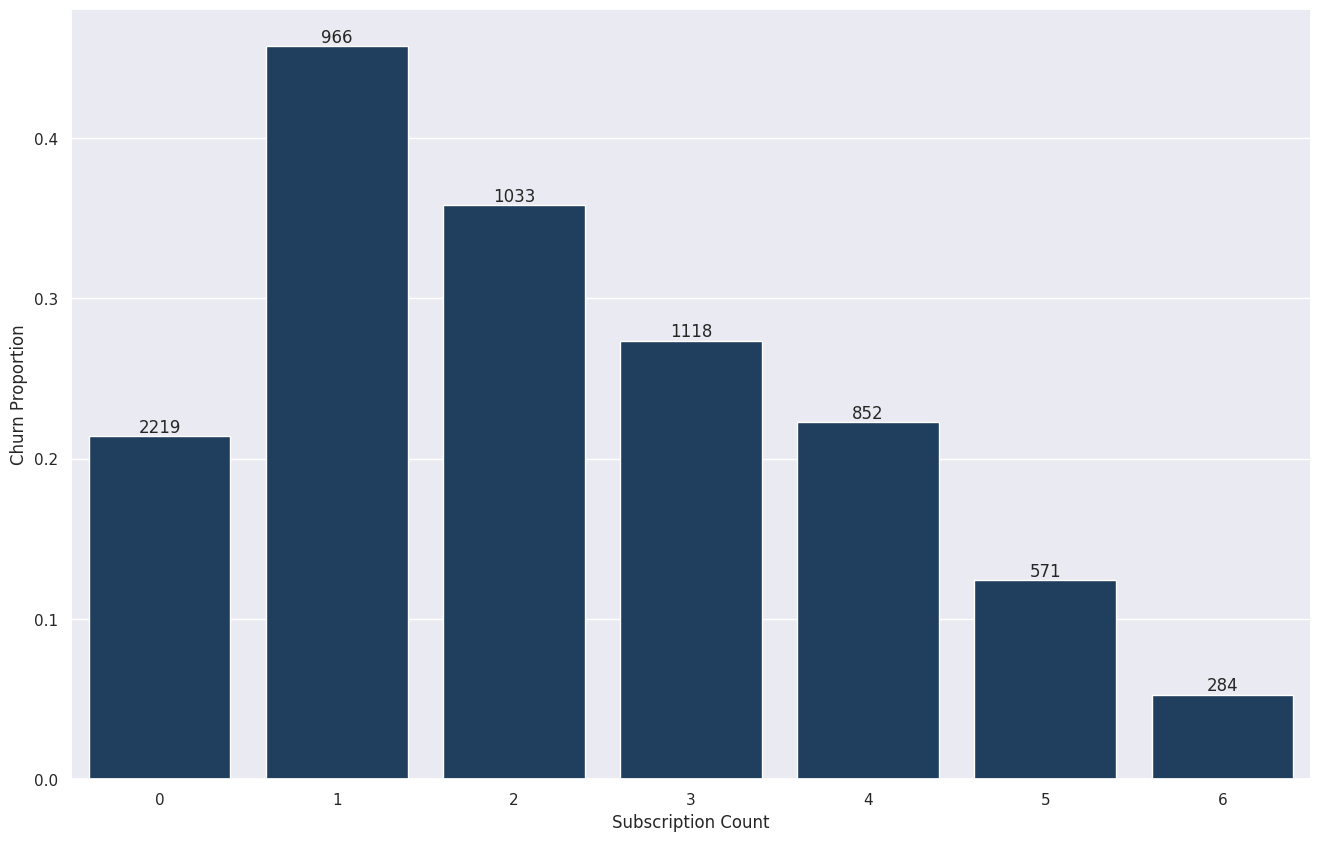

In [ ]:

sub_counts = df.groupby(['Subscription Count'])[['Churn Value']].agg(['count', 'mean']).reset_index()
ax = plt.figure(figsize = (16,10))
ax = sns.barplot(x = sub_counts['Subscription Count'],y = sub_counts['Churn Value']['mean'],color = '#163e67')
plt.ylabel('Churn Proportion')
ax.bar_label(ax.containers[0],labels=sub_counts['Churn Value']['count'])
plt.show()



## 2.2 Churner feedback

Customers fed back various different reasons for why they churned, to gain a better understanding we decided to group these reasons into broader categories.

In [ ]:
group_mapping = {
    'Attitude of support person': 'Customer Service',
    'Competitor offered higher download speeds': 'Competition',
    'Competitor offered more data': 'Competition',
    "Don't know": 'Other',
    'Competitor made better offer': 'Competition',
    'Attitude of service provider': 'Customer Service',
    'Competitor had better devices': 'Competition',
    'Network reliability': 'Product',
    'Product dissatisfaction': 'Product',
    'Price too high': 'Pricing and Charges',
    'Service dissatisfaction': 'Customer Service',
    'Lack of self-service on Website': 'Customer Service',
    'Extra data charges': 'Pricing and Charges',
    'Moved': 'Other',
    'Limited range of services': 'Product',
    'Long distance charges': 'Pricing and Charges',
    'Lack of affordable download/upload speed': 'Pricing and Charges',
    'Poor expertise of phone support': 'Customer Service',
    'Poor expertise of online support': 'Customer Service',
    'Deceased': 'Other'
}

In [ ]:
categories = ["Competitor Offerings", "Customer Service", "Service Quality", "Pricing and Billing", "Don't know", "Other"]
counts = [621,454,382,199,154,59]

data = {'Category': categories,
        'Count': counts}

In [ ]:
cat_count = pd.DataFrame(data)

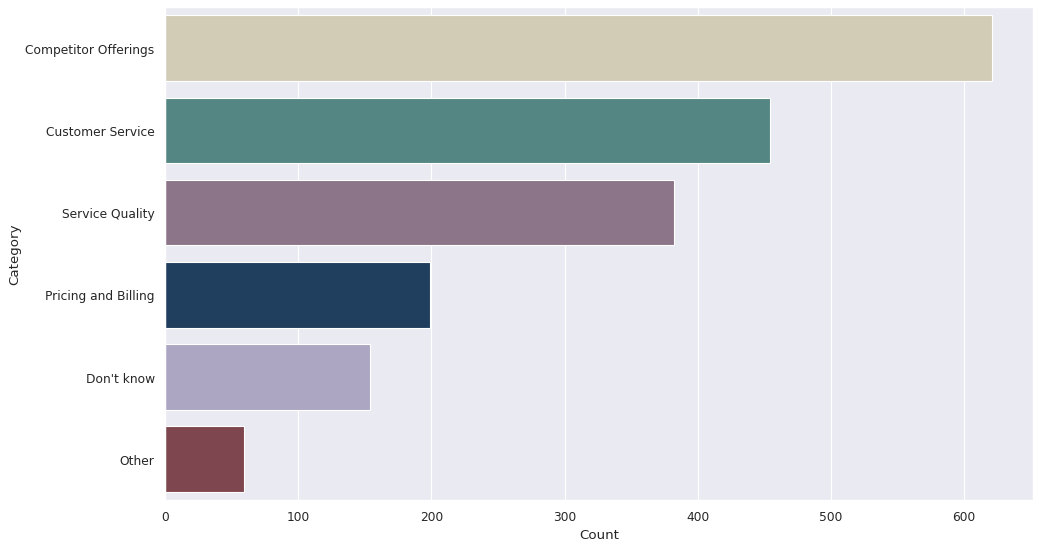

In [ ]:
plt.figure(figsize=(14,8), dpi=80)
ax = sns.barplot(data = cat_count, x = 'Count', y = 'Category', hue = 'Category',palette = ['#D7CEB2','#4B8F8C','#90708C','#163e67','#AAA1C8','#873D48'])

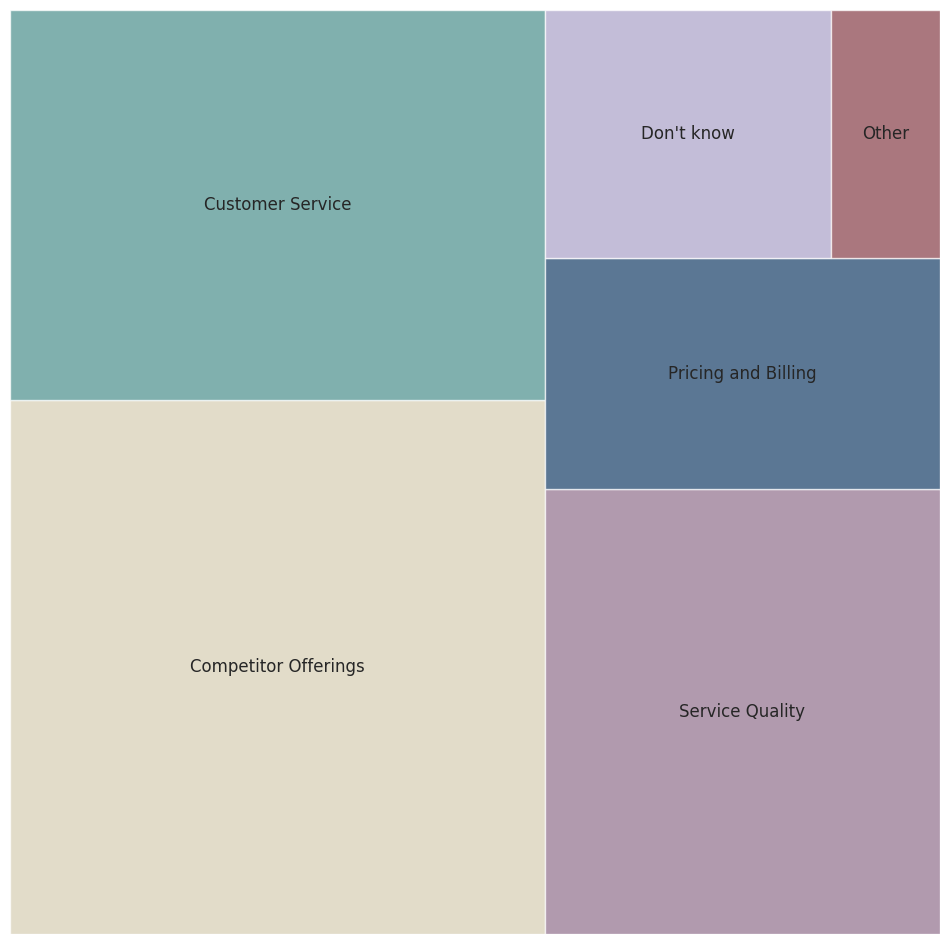

In [ ]:
cat_count = cat_count.sort_values(by='Count', ascending=False)  # Sort categories for visualization
colors = ['#D7CEB2','#4B8F8C','#90708C','#163e67','#AAA1C8','#873D48']

plt.figure(figsize=(12, 12))

squarify.plot(sizes=cat_count['Count'], label=cat_count['Category'], color=colors, alpha=0.7)

plt.axis('off')
plt.show()

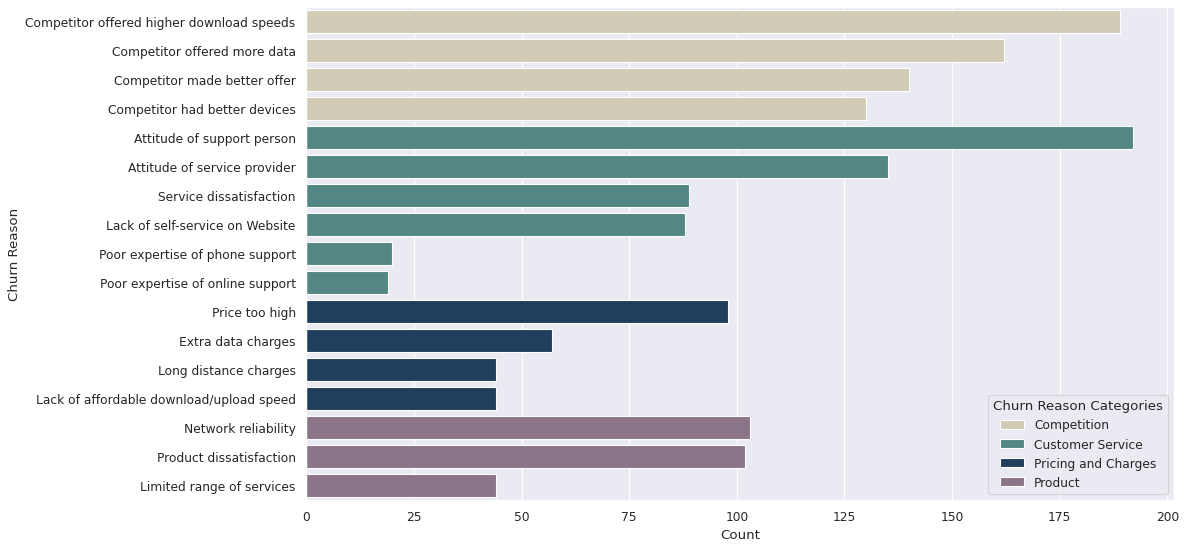

In [ ]:
colours = ['#F5E6E8','#4B8F8C','#293241','#AAA1C8','#90708C']

df['Churn Reason Categories'] = df['Churn Reason'].map(group_mapping)
df_churn = pd.DataFrame(df[['Churn Reason', 'Churn Reason Categories']].value_counts(),columns = ['Count']).reset_index()
df_churn = df_churn.sort_values(['Churn Reason Categories','Count'],ascending=[True,False])

df_churn = df_churn[df_churn['Churn Reason Categories']!='Other']

plt.figure(figsize=(14,8), dpi=80)
ax = sns.barplot(data = df_churn, x = 'Count', y = 'Churn Reason', hue = 'Churn Reason Categories',palette = ['#D7CEB2','#4B8F8C','#163e67','#90708C'])
plt.show()

## 2.1 General analysis

The following function is used to plot average churn rate for the chosen features unique values.
It has been used for the different subscriptions and basic demographics.

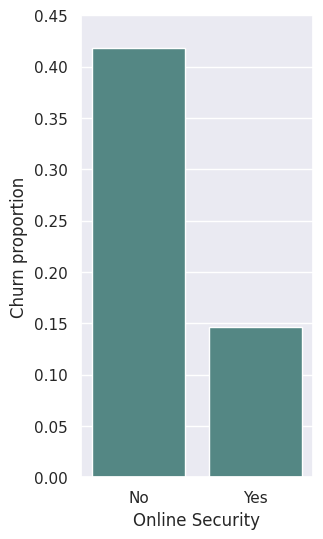

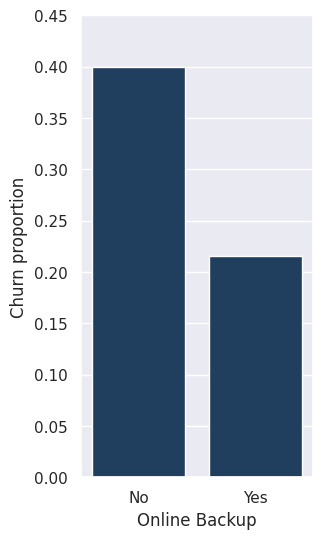

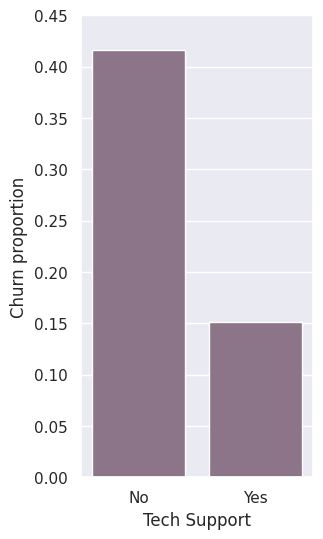

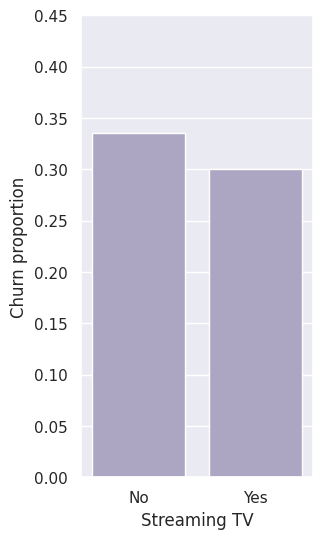

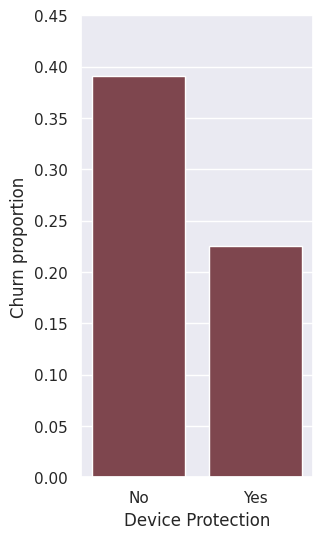

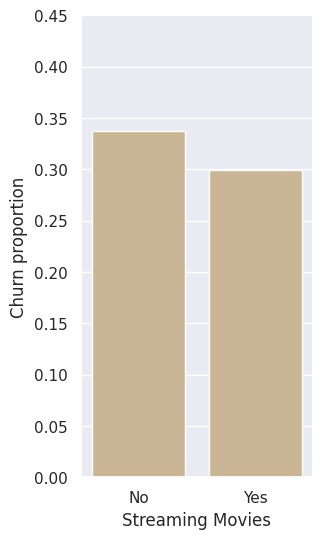

In [ ]:
def plotter(name,df,c,Subscription):
  if Subscription:
      df = df[df['Internet bool'] == True]
  temp_df = df.groupby(name)[['Churn Value']].mean()
  plt.figure(figsize = (3,6))
  plt.ylim([0, 0.45])
  sns.barplot(data = temp_df, x = name, y = 'Churn Value',color = c)
  plt.ylabel('Churn proportion')
  plt.show()


plotter('Online Security',df,'#4B8F8C', True)
plotter('Online Backup',df,'#163e67', True)
plotter('Tech Support',df,'#90708C', True)
plotter('Streaming TV',df,'#AAA1C8', True)
plotter('Device Protection',df,'#873D48', True)
plotter('Streaming Movies',df,'#D3B88C', True)

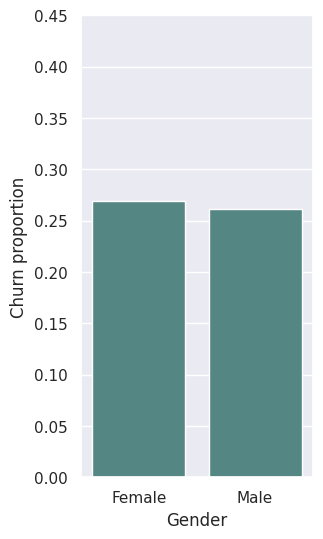

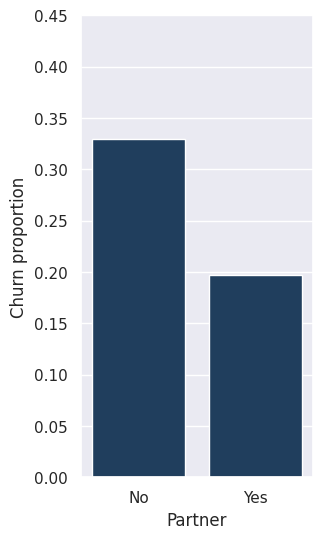

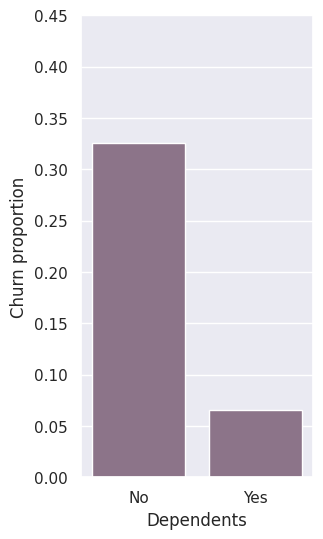

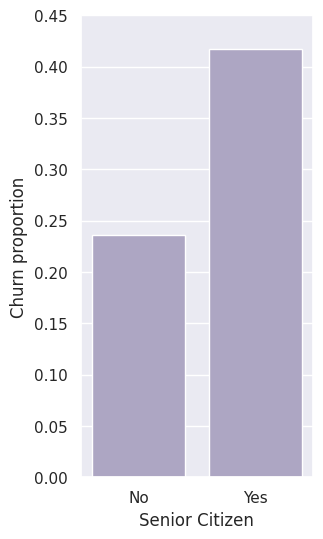

In [ ]:
plotter('Gender',df,'#4B8F8C', False)
plotter('Partner',df,'#163e67', False)
plotter('Dependents',df,'#90708C', False)
plotter('Senior Citizen',df,'#AAA1C8', False)

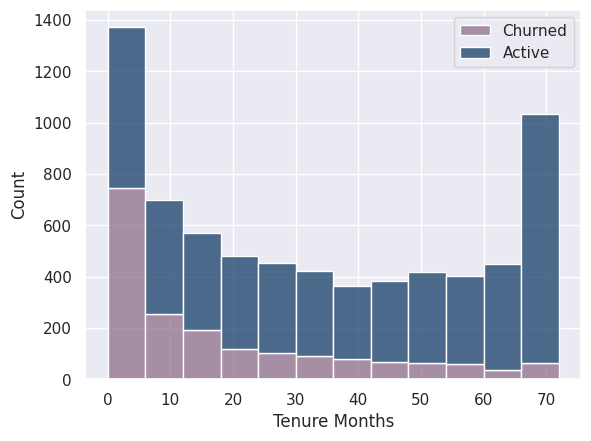

In [ ]:
df[['Tenure Months','Churn Value']]

sns.histplot(data = df, x = 'Tenure Months', hue = 'Churn Value',multiple="stack",bins = 12,palette = ['#163e67','#90708C'])
plt.legend(labels=['Churned','Active'])
plt.show()

----
# 3.0 Test/Train Split
----

In [ ]:
y = df['Churn Value'].copy()
X = df.drop(columns = ['Churn Reason', 'Churn Value', 'Churn Label', 'Lat Long', 'Latitude', 'Longitude', 'City', 'Subscriptions bool', 'Internet bool','Churn Reason Categories'], axis=1).copy()
# dropped latitude and longitude as important geographic data can be taken from zipcode

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train_id = X_train.index
X_test_id = X_test.index

In [ ]:
X_train.head()

,Zip Code,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Subscription Count
2142,92119,Male,No,Yes,No,71,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),98.65,6962.85,3
1623,95327,Female,No,No,No,16,Yes,No,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),93.20,1573.70,3
6074,93543,Female,No,No,No,32,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),104.05,3416.85,4
1362,91731,Female,Yes,Yes,No,24,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),40.65,933.30,2
6754,90043,Female,No,Yes,Yes,20,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,406.05,0


----
# 4.0 Feature Engineering
----
We have already implemented some feature engineering by costructing the subscriptions column. Other than that, we will extract the area from the zip code to group customers based on area and we will be ensuring all data types are numeric for sklearn.

In [ ]:
def zip_translate(zip):
  """
  """
  return int(str(zip)[1:3])

def feature_engineering(df, model):
  """
  Performs our feature engineering on a given dataframe dependent on the model we
  want to use

  Args:
    df (pd dataframe): original df
    model (string): Either lr or dt/df for logistic regression or decision trees/forests respectively

  Returns:
    df (pd dataframe): df with only numeric datatypes and OHE
  """
  df = df.copy() # local df to avoid affecting global df

  # Change service related columns to binary columns
  tertiary_columns = get_vc_columns(df, 3) # get all columns with 3 values
  # make sure we keep contract and internet service for OHE
  if 'Contract' in tertiary_columns: # Accounting for dfs without the full 3 values
    tertiary_columns.remove('Contract')
  if 'Internet Service' in tertiary_columns:
    tertiary_columns.remove('Internet Service')
  for column in tertiary_columns:
    df[column] = df[column].apply(lambda x: x if x in ['Yes', 'No'] else 'No')

  # map all binary columns to numerical for sklearn
  binary_columns = get_vc_columns(df, 2)
  if 'Internet Service' in binary_columns:
    binary_columns.remove('Internet Service')
  for column in binary_columns:
    if column == 'Gender':
      df[column] = df[column].map({'Male': 1, 'Female': 0})
    else:
      df[column] = df[column].map({'Yes': 1, 'No': 0})

  df["Zip Area"] = df["Zip Code"].apply(zip_translate)
  #df.drop("Zip Code",inplace=True)

  # OHE (keep_first = True for dt/rf, keep_first = False for lr)
  if model.lower() == 'lr':
    df = pd.get_dummies(data=df, columns=['Internet Service', 'Payment Method', 'Contract'], prefix=['IntServ', 'PayMeth', 'Cont'], drop_first=True)
  else:
    df = pd.get_dummies(data=df, columns=['Internet Service', 'Payment Method', 'Contract'], prefix=['IntServ', 'PayMeth', 'Cont'], drop_first=False)

  return df

----
# 5.0 Our Models
----
We are going to try two main modelling techniques: logistic regression and decision forests then pick our final model based on comparitive performance. For the evaluation the metrics we're going to be most concered with are:
* Accuracy in general
* Accuracy difference between testing and training data sets
* Recall

Whilst we want recall and precision to be balanced we will ideally prioritize recall. That is to say we aim to minimize false negatives. We deemed it more important to avoid missing customers who are at risk of churning. This could change depending on the uptake of sent offers (20% currently) and the cost of engaging with churn risks.

## 5.1 Initial Feature Analysis and Selection
To determine which features better predit the target we are first going to build an initial primitive model. From this model we will evaluate which features are closer in proximity to the root note and their respective feature weights. This
will drive our decision making at the feature selection stage.

In [ ]:
# Feature engineering on train and test sets
X_train_og_fe = feature_engineering(X_train, 'dt')
X_test_og_fe = feature_engineering(X_test, 'dt')
# Initializing the dt model with limited parameters and fitting
og_dt = DecisionTreeClassifier(max_depth = 6, max_features = 6)
og_dt.fit(X_train_og_fe, y_train)

print(f" For our first model we have: Test Accuracy: {round(og_dt.score(X_train_og_fe, y_train), 3)}, Train Accuracy: {round(og_dt.score(X_test_og_fe, y_test), 3)}")

 For our first model we have: Test Accuracy: 0.806, Train Accuracy: 0.786


Using our initial model we found that tenure months, dependents, type of internet subscription, payment method and contract type as strong predictors for churn risk. We're going to use these as a starting point for feature selection.

In [ ]:
feature_cols = ['Tenure Months', 'Dependents', 'IntServ_DSL', 'IntServ_Fiber optic', 'IntServ_No',
                'PayMeth_Bank transfer (automatic)', 'PayMeth_Credit card (automatic)', 'PayMeth_Electronic check',
                'PayMeth_Mailed check', 'Cont_Month-to-month', 'Cont_One year', 'Cont_Two year', 'Monthly Charges']

## 5.2 Decision Tree
To get a benchmark for performance, we'll try a decision tree implementing grid search for hyperparameter tuning and feature selection as above. Ultimately, we are expecting the random forest to perform better.

### 5.2.1 Model Training

In [ ]:
X_train_dt_fe = feature_engineering(X_train, 'dt')[feature_cols]

In [ ]:
dtgs = GridSearchCV(estimator = DecisionTreeClassifier(),
                    param_grid = {'max_depth': [6, 7, 8], # How many levels can I go down
                                  'min_samples_split': [5, 10, 15], # How many samples to make a split
                                  'min_samples_leaf': [2, 3, 4], # How many samples to make a leaf
                                  'max_features':[8, 10, 14]}, # How many parameters can I use
                    cv = 10, # cross-validation - it will use these parameters on splits of the data set
                    # here we split X_train into 10 segments.
                    refit = True, # do we refit data each run
                    verbose = 1, # how much info
                    scoring = 'accuracy')

In [ ]:
dtgs.fit(X_train_dt_fe, y_train)
dt = dtgs.best_estimator_ # Take the best model from the decision tree grid search
dtgs.best_params_ # what are our best performing hyperparameters

# 'max_depth': 6,
#  'max_features': 8,
#  'min_samples_leaf': 2,
#  'min_samples_split': 10

Fitting 10 folds for each of 81 candidates, totalling 810 fits


{'max_depth': 6,
 'max_features': 8,
 'min_samples_leaf': 3,
 'min_samples_split': 15}

### 5.2.2 Model Evaluation

In [ ]:
# list(zip(list(X_train_dt_fe.columns), dt.feature_importances_))

In [ ]:
X_test_dt_fe = feature_engineering(X_test, 'dt')[feature_cols]
dt_y_pred = dt.predict(X_test_dt_fe)

In [ ]:
dt_train_score = round(dt.score(X_train_dt_fe, y_train), 3)
dt_test_score = round(dt.score(X_test_dt_fe, y_test), 3)
if dt_train_score >= dt_test_score:
  print(f"Decision tree may be overfit, {round((dt_train_score-dt_test_score)*100, 2)}% difference")
else:
  print(f"Decision tree may be underfit, {round((dt_test_score-dt_train_score)*100, 2)}% difference")
print(f"Train score: {dt_train_score}, Test score: {dt_test_score}")

Decision tree may be overfit, 1.4% difference
Train score: 0.801, Test score: 0.787


In [ ]:
# Code for precision/recall and F1-score
print(metrics.classification_report(y_test, dt_y_pred, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.81      0.91      0.86      1009
       Churn       0.68      0.47      0.55       400

    accuracy                           0.79      1409
   macro avg       0.75      0.69      0.71      1409
weighted avg       0.78      0.79      0.77      1409



Our performance on

In [ ]:
probabilities = dt.predict_proba(X_test_dt_fe)[:, 1]  # Probabilities of the positive class

adjusted_predictions = (probabilities >= 0.4).astype(int)

print(metrics.classification_report(y_test, adjusted_predictions, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.88      0.81      0.84      1009
       Churn       0.59      0.71      0.65       400

    accuracy                           0.78      1409
   macro avg       0.74      0.76      0.74      1409
weighted avg       0.80      0.78      0.79      1409



With our decision tree we're having issues with minimizing false negatives. Despite our high accuracy and close fit. Even when adjusting the threshold we're not seeing significant improvements to recall. This poor performance may, in part, be explained by the class imbalance in the original dataset.

In [ ]:
print(f" Only {round(y_train.sum()/(y_train.shape[0]), 2)*100}% of our training data set has churned")

 Only 26.0% of our training data set has churned


## 5.3 Random Forest

### 5.3.1 Model Training

In [ ]:
X_train_df_fe = feature_engineering(X_train, 'df')[feature_cols]

In [ ]:
# WARNING! TOP rf_params can take up to 10 minutes to run, uncomment params below if just skipping through
rf_params = {
    'max_depth': [7, 8],
    'max_features': [6, 7, 8],
    'min_samples_split': [25, 30],
    'min_samples_leaf': [10, 12],
    'n_estimators': [125]
}

# rf_params = {
#     'max_depth': [7],
#     'max_features': [6],
#     'min_samples_split': [25],
#     'min_samples_leaf': [8],
#     'n_estimators': [50]
# }

gs = GridSearchCV(estimator = RandomForestClassifier(), param_grid=rf_params, cv=5, n_jobs = -1)

In [ ]:
gs.fit(X_train_df_fe, y_train)
rf = gs.best_estimator_ # assign our best performing model to rf
gs.best_params_ # The best hyper parameters from the grid search

{'max_depth': 7,
 'max_features': 6,
 'min_samples_leaf': 8,
 'min_samples_split': 25,
 'n_estimators': 50}

### 5.3.2 Model Evaluation

In [ ]:
X_test_df_fe = feature_engineering(X_test, 'df')
X_test_df_fe = X_test_df_fe[feature_cols]
df_y_pred = rf.predict(X_test_df_fe)

In [ ]:
#

In [ ]:
df_train_score = round(rf.score(X_train_df_fe, y_train), 3)
df_test_score = round(rf.score(X_test_df_fe, y_test), 3)
if df_train_score >= df_test_score:
  print(f"Decision forest may be overfit, {round((df_train_score-df_test_score)*100, 2)}% difference")
else:
  print(f"Decision forest may be underfit, {round((df_test_score-df_train_score)*100, 2)}% difference")
print(f"Train score: {df_train_score}, Test score: {df_test_score}")

Decision forest may be overfit, 1.7% difference
Train score: 0.815, Test score: 0.798


Our best fit so far has been around 0.9% overfit

In [ ]:
# Code for precision/recall and F1-score
print(metrics.classification_report(y_test, df_y_pred, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.86      1009
       Churn       0.67      0.57      0.61       400

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.79      0.80      0.79      1409



In [ ]:
probabilities = rf.predict_proba(X_test_df_fe)[:, 1]  # Probabilities of the positive class
adjusted_predictions_df = (probabilities >= 0.34).astype(int)

print(metrics.classification_report(y_test, adjusted_predictions_df, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.89      0.80      0.85      1009
       Churn       0.60      0.76      0.67       400

    accuracy                           0.79      1409
   macro avg       0.75      0.78      0.76      1409
weighted avg       0.81      0.79      0.80      1409



As we are focused on recall, there is a real possibility that adjusting the threshold downwards may be more worthwhile.

We also tried using class weights with the model parameter class_weight='balanced' for our decision forest. This did reduce false negatives and maximize recall but at the cost of overall accuracy and slight overfitting.

## 5.4 Random Forest with SMOTE Oversampling
Because we are still seeing poor performance in performance for classifying Churn on the test set and in particular recall we will try oversampling the training set in order to balance the classes using SMOTE.

### 5.4.1 Model Training and Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
# Warning, smote worked on google collab but there were issues with dependencies in local jupyter lab environments

In [ ]:
# Feature engineering, resampling and selecting features
X_train_rfos_fe = feature_engineering(X_train, 'df')
X_train_rfos_fe, y_train_os = smote.fit_resample(X_train_rfos_fe, y_train)
X_train_rfos_fe = X_train_rfos_fe[feature_cols]

In [ ]:
rf_params = {
    'max_depth': [7, 8],
    'max_features': [6, 7],
    'min_samples_split': [25, 30],
    'min_samples_leaf': [10],
    'n_estimators': [125]
}

gsos = GridSearchCV(estimator = RandomForestClassifier(), param_grid=rf_params, cv=5, n_jobs = -1)

In [ ]:
gsos.fit(X_train_rfos_fe, y_train_os)
rfos = gs.best_estimator_ # assign our best performing model to rfos
gsos.best_params_ # The best hyper parameters from the grid search

{'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 10,
 'min_samples_split': 30,
 'n_estimators': 125}

### 5.4.2 Model Evaluation

In [ ]:
X_test_rfos_fe = feature_engineering(X_test, 'df')
X_test_rfos_fe = X_test_df_fe[feature_cols]
rfos_y_pred = rfos.predict(X_test_rfos_fe)

In [ ]:
rf_train_score = round(rfos.score(X_train_rfos_fe, y_train_os), 3)
rf_test_score = round(rfos.score(X_test_rfos_fe, y_test), 3)
if rf_train_score >= rf_test_score:
  print(f"Decision forest may be overfit, {round((rf_train_score-rf_test_score)*100, 2)}% difference")
else:
  print(f"Decision forest may be underfit, {round((rf_test_score-rf_train_score)*100, 2)}% difference")
print(f"Train score: {rf_train_score}, Test score: {rf_test_score}")

Decision forest may be underfit, 10.4% difference
Train score: 0.694, Test score: 0.798


In [ ]:
print(metrics.classification_report(y_test, rfos_y_pred, target_names=['No Churn', 'Churn']))

              precision    recall  f1-score   support

    No Churn       0.84      0.89      0.86      1009
       Churn       0.67      0.57      0.61       400

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.79      0.80      0.79      1409



At different stages we've had more overfitting and underfitting by oversampling. The overfitting is to be expected. However, this degree of overfitting means the model will likely not generalize well despite some version of the model's training leading to higher recall numbers and therefore classifying fewer false negatives.

We will therefore not continue oversampling.

## 5.5 Logistic Regression

### 5.5.1 Model Training SKLearn

In [ ]:
X_train_lr_fe = feature_engineering(X_train, 'lr')
X_train_lr_fe.columns

Index(['Zip Code', 'Gender', 'Senior Citizen', 'Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Paperless Billing', 'Monthly Charges',
       'Total Charges', 'Subscription Count', 'Zip Area',
       'IntServ_Fiber optic', 'IntServ_No', 'PayMeth_Credit card (automatic)',
       'PayMeth_Electronic check', 'PayMeth_Mailed check', 'Cont_One year',
       'Cont_Two year'],
      dtype='object')

In [ ]:
# list of tested feature columns to maxisise metrics
lr_feature_cols = X_train_lr_fe.columns # all columns through feature engineering

# experimentation
# lr_feature_cols = ['Tenure Months', 'Dependents',
#        'IntServ_Fiber optic', 'IntServ_No',
#         'PayMeth_Credit card (automatic)',
#        'PayMeth_Electronic check', 'PayMeth_Mailed check', 'Cont_One year', 'Cont_Two year'] #removed 'Cont_Month-to-month', 'IntServ_DSL', 'PayMeth_Bank transfer (automatic)',

# # these are the highest correlated features based on .corr()
# lr_feature_cols = ['Tenure Months','Online Security',
#        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
#        'Streaming Movies', 'Cont_One year', 'Cont_Two year','Paperless Billing','PayMeth_Credit card (automatic)',
#        'PayMeth_Electronic check', 'PayMeth_Mailed check','Monthly Charges','Total Charges']

# columns removed due to high pvalues
# lr_feature_cols = ['Partner', 'Dependents',
#        'Tenure Months', 'Phone Service', 'Multiple Lines', 'Online Security',
#        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
#        'Streaming Movies', 'Paperless Billing',
#        'Total Charges', 'Subscription Count',
#        'IntServ_Fiber optic', 'IntServ_No',
#        'PayMeth_Electronic check','Cont_One year',
#        'Cont_Two year']

In [ ]:
# take only the wanted features into X_train
X_train_lr_fe = X_train_lr_fe[lr_feature_cols]

In [ ]:
# apply the scalar to the training data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_train_lr_fe)
scaled_df = pd.DataFrame(scaled_data, columns=X_train_lr_fe.columns)

In [ ]:
df_train = scaled_df

# creating the regression object
lr = LogisticRegression(max_iter=300, random_state=10)

In [ ]:
# fitting the model
lr.fit(df_train, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [ ]:
# predicting churn value
df_train[['prob_stay', 'prob_churn']] = lr.predict_proba(df_train)
df_train['churn_pred'] = np.where(df_train['prob_churn']>.5, 1, 0)

In [ ]:
# test set
X_test_lr_fe = feature_engineering(X_test,'lr')
X_test_lr_fe = X_test_lr_fe[lr_feature_cols]

# scale the test set
scaled_data = scaler.transform(X_test_lr_fe)
scaled_df_test = pd.DataFrame(scaled_data, columns=X_train_lr_fe.columns)

df_test = scaled_df_test.copy()

In [ ]:
# add the probabilities and churn predition to the dataframe
df_test[['prob_stay', 'prob_churn']] = lr.predict_proba(scaled_df_test)
df_test['churn_pred'] = np.where(df_test['prob_churn']>.5, 1, 0)

### 5.5.2 Model Evaluation SKLearn

In [ ]:
# metrics function
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [ ]:
# training metrics
get_results(y_train,df_train["churn_pred"])

The confusion matrix for your predictions is:
[[3749  416]
 [ 618  851]] 

The accuracy of your model is: 0.8164714235001775
The recall of your model is: 0.5793056501021103
The precision of your model is: 0.6716653512233622
The F1-score of your model is: 0.6220760233918129


In [ ]:
# test metrics
get_results(y_test,df_test["churn_pred"])

The confusion matrix for your predictions is:
[[900 109]
 [169 231]] 

The accuracy of your model is: 0.8026969481902059
The recall of your model is: 0.5775
The precision of your model is: 0.6794117647058824
The F1-score of your model is: 0.6243243243243244


In [ ]:
# or can look at same metrics in this format
#print(metrics.classification_report(y_train, df_train['churn_pred']));
print(metrics.classification_report(y_test, df_test['churn_pred']))

              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1009
           1       0.68      0.58      0.62       400

    accuracy                           0.80      1409
   macro avg       0.76      0.73      0.75      1409
weighted avg       0.80      0.80      0.80      1409



### 5.5.3 Model Training Statsmodels

In [ ]:
# list of tested feature columns to maxisise metrics
#lr_feature_cols = X_train_lr_fe.columns # all columns through feature engineering

# experimentation
# lr_feature_cols = ['Tenure Months', 'Dependents',
#        'IntServ_Fiber optic', 'IntServ_No',
#         'PayMeth_Credit card (automatic)',
#        'PayMeth_Electronic check', 'PayMeth_Mailed check', 'Cont_One year', 'Cont_Two year'] #removed 'Cont_Month-to-month', 'IntServ_DSL', 'PayMeth_Bank transfer (automatic)',

# # these are the highest correlated features based on .corr()
# lr_feature_cols = ['Tenure Months','Online Security',
#        'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
#        'Streaming Movies', 'Cont_One year', 'Cont_Two year','Paperless Billing','PayMeth_Credit card (automatic)',
#        'PayMeth_Electronic check', 'PayMeth_Mailed check','Monthly Charges','Total Charges']

# columns removed due to high pvalues
lr_feature_cols = ['Partner', 'Dependents',
       'Tenure Months', 'Phone Service', 'Multiple Lines', 'Paperless Billing',
       'Total Charges',
       'IntServ_Fiber optic', 'IntServ_No',
       'PayMeth_Electronic check','Cont_One year',
       'Cont_Two year']

In [ ]:
X_train_lr_fe = X_train_lr_fe[lr_feature_cols]

In [ ]:
# logisistic regression model with statsmodels
log_reg = sm.Logit(y_train, X_train_lr_fe).fit()

Optimization terminated successfully.
         Current function value: 0.399633
         Iterations 8


### 5.5.4 Model Evaluation Statsmodels

In [ ]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 5634
Model:                          Logit   Df Residuals:                     5622
Method:                           MLE   Df Model:                           11
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                  0.3036
Time:                        09:03:31   Log-Likelihood:                -2251.5
converged:                       True   LL-Null:                       -3232.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Partner                      0.2893      0.084      3.429      0.001       0.124       0.455
Dependents                  -1.4859      0.130    -11.416      0.000      -1.741      -1.

## 5.6 Model Selection
We are going to proceed with the random forest model. It did not significantly outperform logistics regression but it performed slightly better in terms of overfitting.

----
# 6.0 List Creation
----
The aim of this section is to create the two deliverable lists. The ID list of the top 500 current customers who are likely to churn and the ID and churn probabilities of the remaining customers.

In [ ]:
# assigning the random forest probabilities
df_train_results = rf.predict_proba(X_train_df_fe)
df_test_results = rf.predict_proba(X_test_df_fe)

In [ ]:
# turning the probabilities into dataframes
df_train_results = pd.DataFrame(df_train_results,columns=["Stay_prob","Churn_prob"])
df_test_results = pd.DataFrame(df_test_results,columns=["Stay_prob","Churn_prob"])

### 6.1 Formatting

Reintroducing the ids, the actual churn value and recombining test and train.

In [ ]:
def consolidation(df,id,real_churn):
  ''' this funciton adds the id column and the actual churn value to a dataframe'''
  df = df.copy()
  df['id'] = id
  df = df.set_index('id')
  df["Churn Value"] = real_churn
  return df

In [ ]:
                         #df with probs, ids, true churn val
df_train = consolidation(df_train_results,X_train_id,y_train)
df_test = consolidation(df_test_results,X_test_id,y_test)

In [ ]:
# combining train and test and resorting index
df_whole = pd.concat([df_train,df_test])
df_whole = df_whole.sort_index()

In [ ]:
df_whole.head()

,Stay_prob,Churn_prob,Churn Value
id,,,
0,0.527767,0.472233,1
1,0.444318,0.555682,1
2,0.541727,0.458273,1
3,0.792532,0.207468,1
4,0.886957,0.113043,1


In [ ]:
# Only selecting the customers who haven't churned yet
current_customer_list = df_whole[df_whole["Churn Value"]==0]

In [ ]:
current_customer_list.head()

,Stay_prob,Churn_prob,Churn Value
id,,,
1869,0.340134,0.659866,0
1870,0.900746,0.099254,0
1871,0.917548,0.082452,0
1872,0.941643,0.058357,0
1873,0.713382,0.286618,0


In [ ]:
# Creating a simple dataframe only including id and churn probability
customer_list = current_customer_list[["Churn_prob"]]

Need customer list to exclude top 500

In [ ]:
# creating a dataframe with the top 500 most likely to churn ids and probablilites
top_500_churn = customer_list.sort_values("Churn_prob",ascending=False).head(500)

In [ ]:
# only want the indexs
top_500_churn_index = top_500_churn.drop("Churn_prob",axis=1)

In [ ]:
customer_list.shape

(5174, 1)

In [ ]:
# removing the top 500 from customer list
customer_list.drop(top_500_churn_index.index,inplace=True)

<ipython-input-137-ca71dddb27d8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_list.drop(top_500_churn_index.index,inplace=True)


In [ ]:
customer_list.shape

(4674, 1)

### 6.2 Exporting

In [ ]:
# CSV creation

top_500_churn_index.to_csv('top_500_churn.csv', index=True,header=False)
customer_list.to_csv('customer_list.csv', index=True)

----
# 7.0 Exploring Incentives
----
We wanted to explore what we could offer the 500 most at-risk customers to reduce the churn rate. We chose to work with these three features as variables
* **Internet service type**
* **Monthly charges**
* **Contract**

We will initially calculate **churn rate** and **average probability to churn** in the top 500 customers. We will then compare these metrics against the top 500 customers with different offers applied. We have calculated these with the 50% probability threshold in mind but the broader insights would still apply for lowerthresholds and average probability to churn would be a good metric to keep an eye on this.


## 7.1 Top 500 at-risk Customers
We process the df to get the top 500 customers and then apply the feature engineering

In [ ]:
top_500 = df.loc[top_500_churn.index].copy()

In [ ]:
top_500["Internet Service"].value_counts()

Fiber optic    398
DSL            102
Name: Internet Service, dtype: int64

In [ ]:
# feature engineering
top_500 = top_500.drop(columns = ['Churn Reason', 'Lat Long', 'Latitude', 'Longitude', 'City', 'Churn Reason Categories'], axis=1).copy() # subscriptions may need to be dropped
ordinary_service = feature_engineering(top_500, 'rf') # df of top 500
# We need to reattach the missing OHE columns for model fitting
ordinary_service ['IntServ_No'] = 0
ordinary_service ['Cont_One year'] = 0
ordinary_service ['Cont_Two year'] = 0
ordinary_service = ordinary_service[feature_cols]

In [ ]:
# Sum how many customers we expect to churn
rf.predict(ordinary_service).sum()

500

In [ ]:
# Calculate average probability to churn
og_probs = rf.predict_proba(ordinary_service)
og_probs[:, 1].mean()

0.603918956381324

For our top 500 at-risk customers, without applying any offers
* **Predicted churn rate**: 100%
* **Average churn probability**: ~60%


## 7.2 Discounts to Monthly Rate
We examine the effects of a 10%, 20% and 40% discount as we consider this to be a reasonable range of discounts.

In [ ]:
def monthly_discount(df, discount):
  ''' recalculates the monthly charges column based on a discount (decimal)'''
  df = df.copy()
  df["Monthly Charges"] = df["Monthly Charges"]*(1-discount)
  return df

In [ ]:
df_discount_10 = monthly_discount(ordinary_service, 0.1)
df_discount_20 = monthly_discount(ordinary_service, 0.2)
df_discount_40 = monthly_discount(ordinary_service, 0.4)

In [ ]:
print(f"Churn rate with a 10% discount is {round((rf.predict(df_discount_10).sum()/500)*100, 2)}%")
print(f"Churn rate with a 20% discount is {round((rf.predict(df_discount_20).sum()/500)*100, 2)}%")
print(f"Churn rate with a 40% discount is {round((rf.predict(df_discount_40).sum()/500)*100, 2)}%")

Churn rate with a 10% discount is 73.4%
Churn rate with a 20% discount is 57.6%
Churn rate with a 40% discount is 40.4%


In [ ]:
og_probs = rf.predict_proba(df_discount_40)
og_probs[:, 1].mean()

0.5065584105493017

## 7.3 Internet Service Offers
around 10% of our top 500 at-risk customer are on DSL and around 90% are on fibre optic. We've seen that fibre optic is a good indicator that someone may churn. If it's possible, could we offer a switch to DSL if our fibre optic lines are doing well?

In [ ]:
df_internet = ordinary_service.copy()
df_internet['IntServ_DSL'] = 1
df_internet['IntServ_Fiber optic'] = 0
df_internet['IntServ_No'] = 0

In [ ]:
print(f"Churn rate is {round((rf.predict(df_internet).sum()/500)*100, 2)}%")

Churn rate is 20.4%


In [ ]:
disc_proba = rf.predict_proba(df_internet)
print(disc_proba[:, 1].mean())

0.35520920125574584


## 7.4 Changes in Contract
We could consider offering a change in contract in conjunction with the other offers. By itself it does not make as much sense for the top 500 at-risk customers. However, it may be a strong indicator for initial sign-ups.

In [ ]:
df_contract_1y = ordinary_service.copy()
df_contract_2y = ordinary_service.copy()

In [ ]:
df_contract_1y['Cont_One year'] = 1
df_contract_1y['Cont_Month-to-month'] = 0
df_contract_2y['Cont_Two year'] = 1
df_contract_2y['Cont_Month-to-month'] = 0

In [ ]:
print(f"Churn rate is {round((rf.predict(df_contract_1y).sum()/500)*100, 2)}%")
print(f"Churn rate is {round((rf.predict(df_contract_2y).sum()/500)*100, 2)}%")

Churn rate is 0.2%
Churn rate is 0.0%


In [ ]:
disc_proba = rf.predict_proba(df_contract_2y)
print(disc_proba[:, 1].mean())

0.19946896413586068


The performance of different contract types is stark. Using this, we can confidently recommend the type of contract to be what sales advisors focus on for customer sign-ups (and can be incentivized with the $2.50 per customer bonus).

## 7.5 Misc
Distribution of churning probabilities bucketed

In [ ]:
bins = [0, 0.1, 0.3,  0.4, 0.6, 0.8]
labels = ['Very Low Risk', 'Low Risk', 'Medium Risk', 'High Risk', 'Very High Risk']
current_customer_list['Risk_Level'] = pd.cut(current_customer_list['Churn_prob'], bins=bins, labels=labels, include_lowest=True)

<ipython-input-558-615bc28d078a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_customer_list['Risk_Level'] = pd.cut(current_customer_list['Churn_prob'], bins=bins, labels=labels, include_lowest=True)


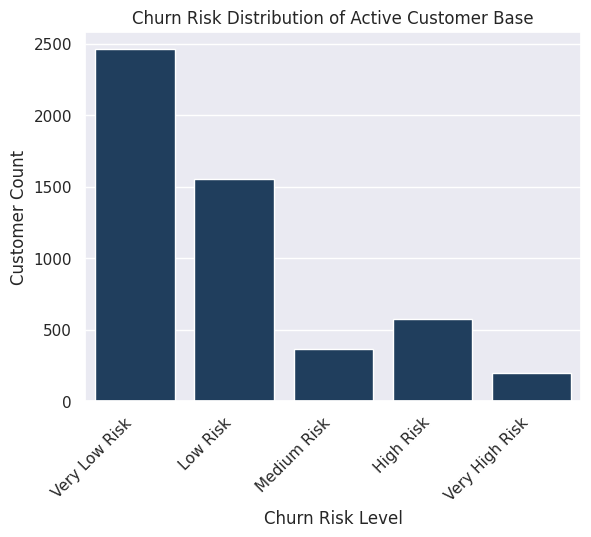

In [ ]:

sns.countplot(x='Risk_Level', data=current_customer_list, order=labels, color = '#163e67')
plt.xlabel('Churn Risk Level')
plt.ylabel('Customer Count')
plt.title('Churn Risk Distribution of Active Customer Base')
plt.xticks(rotation=45, ha='right')
plt.show()